In [1]:
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests


import numpy as np
from scipy.stats import *
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
le = LabelEncoder()

In [2]:
emission = pd.read_csv("greenhouse.csv")
emission.rename({"country_or_area": "country"}, axis=1, inplace=True)
emission["country_encoded"] = le.fit_transform(emission.country)
emission.head()

,country,year,value,category,country_encoded
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0


In [3]:
X = emission.drop(["country", "year", "category", "country_encoded"], axis=1)
y = emission["country_encoded"].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

model = svm.SVC(C=0.02, gamma=0.06)
model.fit(X_train, Y_train)
pred = model.predict(X_test)


train_pred = model.predict(X_train)


print ("====  TEST ACCURACY ====")
print ("{} %".format(model.score(Y_test, pred) * 100))

print ("==== Training Accuracy ====")
print ("{} %".format(model.score(Y_train, train_pred) * 100))

/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


====  TEST ACCURACY ====


/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


91.20095124851368 %
==== Training Accuracy ====


/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


91.1362284354551 %


In [4]:
emission.columns

Index(['country', 'year', 'value', 'category', 'country_encoded'], dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler

In [10]:
std = StandardScaler()

emission["scaled_value"] = std.fit_transform(emission["value"].values.reshape(-1,1))

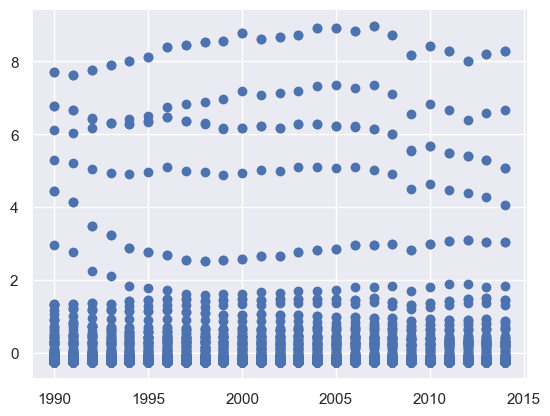

In [11]:
sns.set()
plt.scatter(emission.year, emission.scaled_value)

7422207.96295139
==== standard form ====
7.42220796295139 * 10^6


<AxesSubplot: xlabel='value', ylabel='Count'>

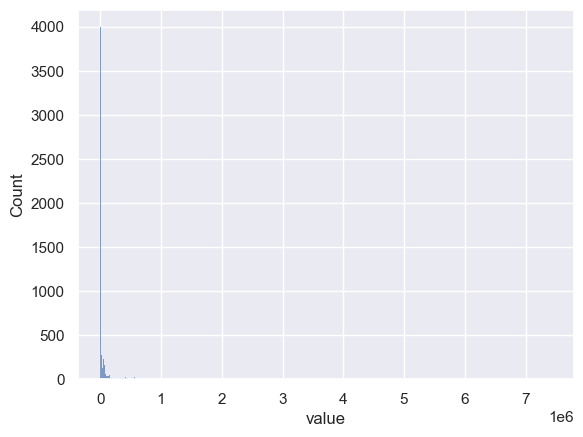

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
import random as rd
genes = ["gene" + str(i) for i in range(1,101)]

wt = ["wt" + str(i) for i in range(1,6)]
ko = ["ko" + str(i) for i in  range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene, "wt1": "wt5"] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, "ko1": "ko5"] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,785,764,761,778,761,600,605,609,609,600
gene2,253,258,274,267,267,63,49,48,41,51
gene3,697,722,719,657,700,911,895,946,917,938
gene4,569,570,604,596,567,769,756,730,807,717
gene5,951,950,929,978,998,999,1014,919,1003,983
...,...,...,...,...,...,...,...,...,...,...
gene96,400,434,414,441,448,833,844,867,813,865
gene97,242,249,250,228,251,207,218,199,195,189
gene98,260,245,273,252,282,496,527,529,515,531
gene99,1003,1001,965,1001,960,872,759,823,838,831


In [ ]:
print (data.head())
print (data.columns)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1   96   85  109  104   99  411  411  423  422  411
gene2  211  193  199  219  218  890  861  836  943  885
gene3  723  651  687  702  712  169  142  180  173  173
gene4  876  900  931  951  981  375  336  344  339  349
gene5  181  216  208  211  200  437  441  478  377  377
Index(['wt1', 'wt2', 'wt3', 'wt4', 'wt5', 'ko1', 'ko2', 'ko3', 'ko4', 'ko5'], dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
std = StandardScaler()

In [ ]:
scaled_data = std.fit_transform(data.T)

[[-1.01541723 -0.98813056  1.10298259  0.8173387  -1.16225397 -0.99444114
  -0.87981383  0.837146   -0.8286253   1.00383615  0.43750436  1.05943622
   0.9438923  -1.06699253 -0.98193543  0.96927207  0.99119677 -0.58372293
   1.17544545 -1.08168232  1.17411685  1.30740061  0.51927587  1.00201295
   0.86245626  0.88797133 -0.84041383 -1.06070998  0.87192367  0.97254872
  -1.04346824  1.82822711  1.19614264  1.09371584  0.85658691  2.05272507
   0.81999991  1.00278006 -0.96071751  0.9703838   0.88859132  1.55435242
  -0.96258665  0.95844145 -1.06788611  1.06054479 -1.08940754  1.03559307
  -1.1341665  -1.61247681 -1.00216731  0.90375067 -1.0217738  -0.90579781
   0.98085666 -0.99167149  1.03704445  0.98097624 -1.50206477 -0.984038
  -0.94970027 -1.01420665  0.96681845 -1.00692218 -1.02737556  1.16478111
  -1.36817644  0.70484437  1.02040713 -0.97001191 -1.23956443 -0.88113949
   0.8241189   0.80969487 -0.94258026 -0.88663029 -0.31763526  0.79196666
  -0.55982858 -1.89404015 -0.91330655  0

<AxesSubplot: ylabel='Count'>

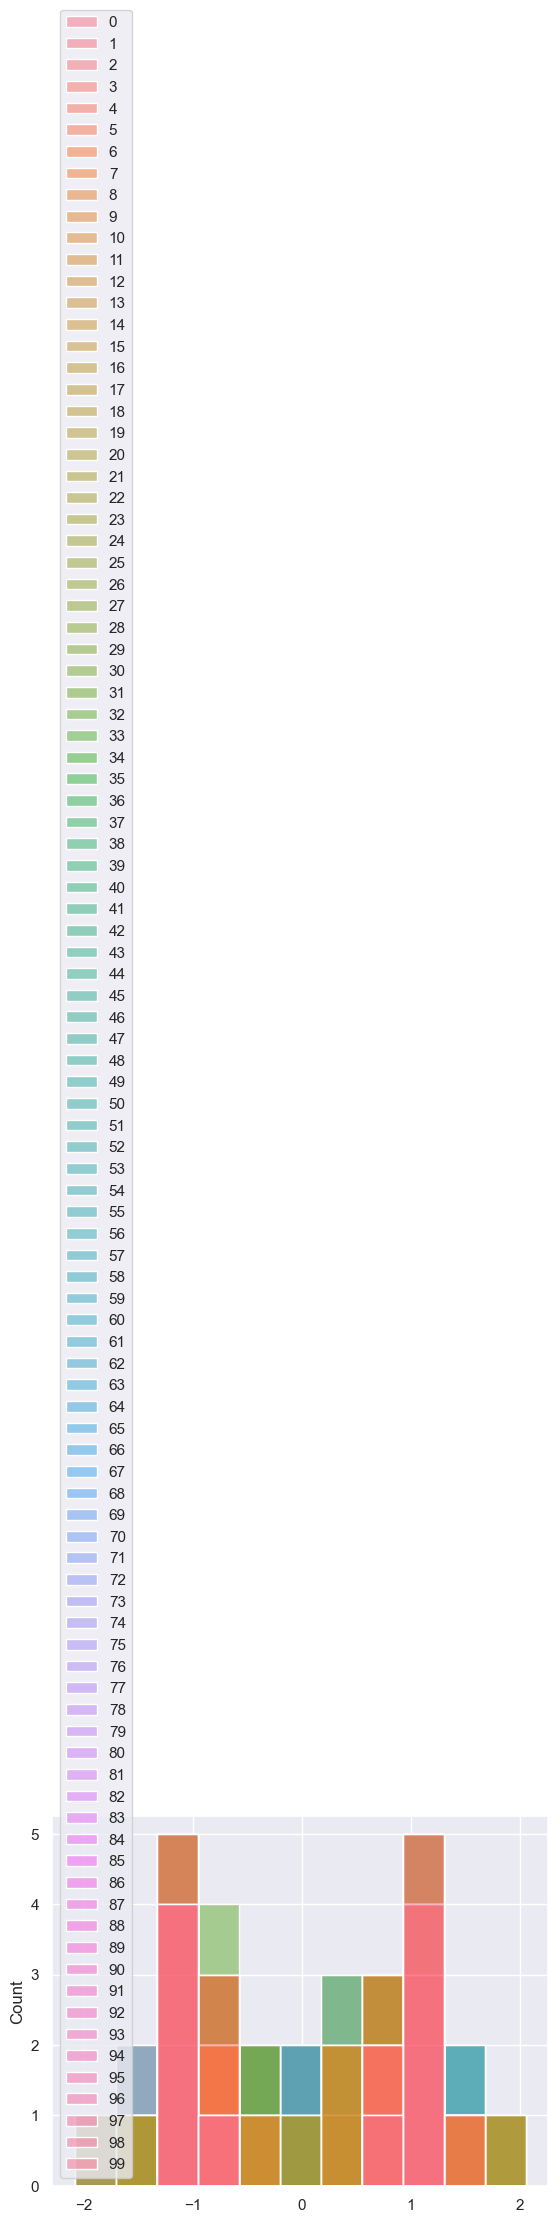

In [ ]:
print (scaled_data)

sns.histplot(scaled_data)

In [ ]:
pca = PCA()

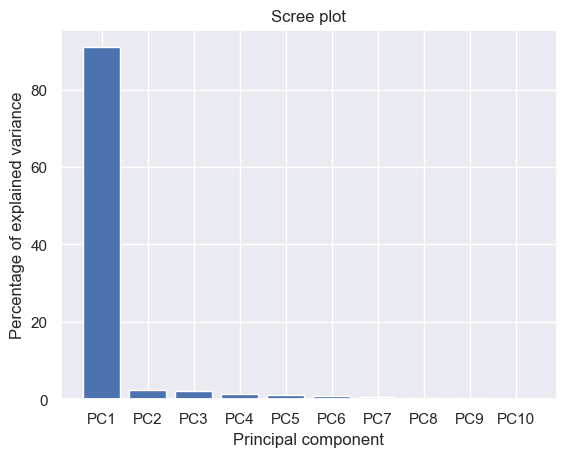

91.0317912115939 %


In [ ]:
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel("Principal component")
plt.title("Scree plot")
plt.show()

print (f"{max(pca.explained_variance_ratio_) * 100} %")

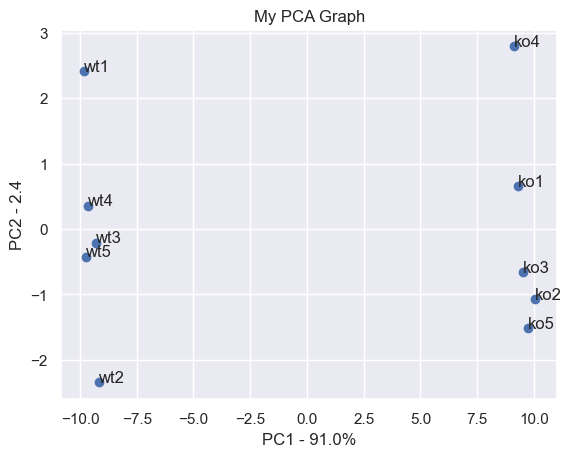

In [ ]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA Graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

The separation of the two clusters along the x-axis suggests that "wt" samples are very different from "ko" samples

In [ ]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values

print (loading_scores[top_10_genes])


gene56    0.104778
gene20    0.104757
gene16   -0.104734
gene61    0.104699
gene65    0.104681
gene64    0.104670
gene57   -0.104668
gene3    -0.104653
gene96   -0.104633
gene75    0.104627
dtype: float64


In [ ]:
print (per_var)

[91.   2.4  2.   1.3  1.2  0.9  0.5  0.4  0.3  0. ]


In [ ]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,96,85,109,104,99,411,411,423,422,411
gene2,211,193,199,219,218,890,861,836,943,885
gene3,723,651,687,702,712,169,142,180,173,173
gene4,876,900,931,951,981,375,336,344,339,349
gene5,181,216,208,211,200,437,441,478,377,377


In [ ]:
print (pca_data)

[[-9.83724197e+00  2.41691214e+00 -1.59195832e+00  2.38882560e-01
  -1.50267380e+00 -6.46753495e-01 -8.33537975e-01  2.18397462e-01
   3.58752241e-01  6.93889390e-16]
 [-9.14326830e+00 -2.34454704e+00 -9.58340384e-01 -4.13022948e-01
   9.62587227e-01  8.78934522e-01 -1.10782191e+00 -6.62074704e-01
   2.14961845e-01  1.80411242e-15]
 [-9.30661754e+00 -2.08793138e-01  2.72823500e+00 -1.19662931e+00
  -1.62395621e+00  6.20685186e-01  3.88983057e-01 -2.23142706e-01
  -1.94411900e-01  1.80411242e-15]
 [-9.64880154e+00  3.58255163e-01  2.62005843e-01 -1.02761725e+00
   1.84289854e+00 -1.50132774e+00  3.11306021e-01  4.47016484e-01
  -5.45511709e-01  1.79023463e-15]
 [-9.74637627e+00 -4.22800627e-01 -3.76037693e-01  2.36194012e+00
   2.98299827e-01  6.45548592e-01  1.20791699e+00  2.35140936e-01
   1.83759516e-01  3.16413562e-15]
 [ 9.30704789e+00  6.60229538e-01 -1.12665272e+00 -1.17645118e+00
   1.46473628e-01 -3.04596408e-01  1.09172229e+00 -9.48514144e-01
   7.04278687e-01  8.88178420e-16

In [ ]:
gene = ["gene" + str(i) for i in range(1, 11)]
pca_data_1 = pd.DataFrame(pca_data, columns=(*wt, *ko), index=gene)
pca_data_1

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,-9.837242,2.416912,-1.591958,0.238883,-1.502674,-0.646753,-0.833538,0.218397,0.358752,6.938894e-16
gene2,-9.143268,-2.344547,-0.958340,-0.413023,0.962587,0.878935,-1.107822,-0.662075,0.214962,1.804112e-15
gene3,-9.306618,-0.208793,2.728235,-1.196629,-1.623956,0.620685,0.388983,-0.223143,-0.194412,1.804112e-15
gene4,-9.648802,0.358255,0.262006,-1.027617,1.842899,-1.501328,0.311306,0.447016,-0.545512,1.790235e-15
gene5,-9.746376,-0.422801,-0.376038,2.361940,0.298300,0.645549,1.207917,0.235141,0.183760,3.164136e-15
gene6,9.307048,0.660230,-1.126653,-1.176451,0.146474,-0.304596,1.091722,-0.948514,0.704279,8.881784e-16
gene7,10.025826,-1.072227,1.774737,0.375700,0.221319,-0.623038,-0.499324,0.775230,1.015705,-2.525757e-15
gene8,9.522415,-0.662304,0.455412,1.518007,-0.598484,-1.127987,-0.373002,-0.852318,-0.806752,-8.049117e-16
gene9,9.097374,2.790484,0.719296,0.168289,1.194666,1.502510,-0.438435,0.054880,-0.337022,-1.776357e-15
gene10,9.729643,-1.515208,-1.886697,-0.849098,-0.941130,0.556025,0.252193,0.955385,-0.593760,-1.082467e-15


['wt1', 'wt2', 'wt3', 'wt4', 'wt5']


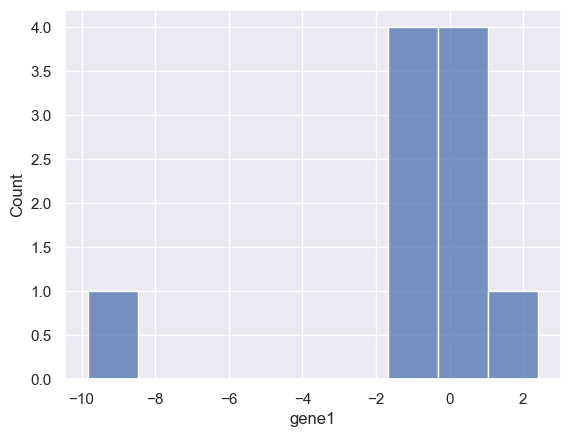

In [ ]:


sns.histplot(x=pca_data_1.loc["gene1"], data=pca_data_1)
print (wt)

/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.25777143239974976, pvalue=0.0)


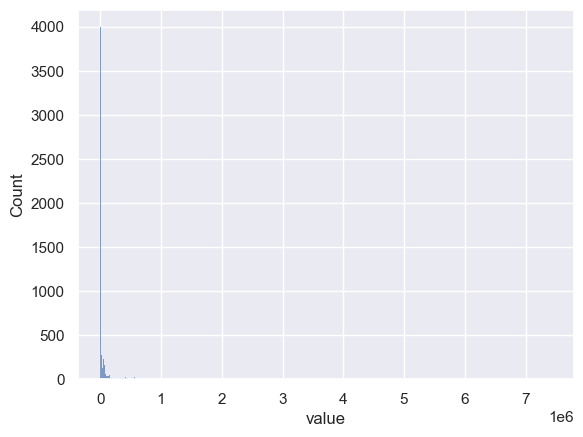

In [ ]:
sns.histplot(x="value", data=emission) 
print (shapiro(emission.value))

In [ ]:
emission.head()

,country,year,value,category,country_encoded,scaled_value
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0.233278
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0.237988
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249863
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0.246434
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249538
